**Step 1: Load and Preprocess the Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

# Load the dataset with column names
column_names = ["class", "datapoint"]
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment-dataset/ecommerceDataset.csv', header=None, names=column_names)

# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class      50425 non-null  object
 1   datapoint  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None


In [3]:
data.head(-10)

,class,datapoint
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50410,Electronics,"Nokia Lumia 530 (Dual SIM, Grey) Colour:Grey ..."
50411,Electronics,JioFi 4G Hotspot M2S 150 Mbps Jio 4G Portable ...
50412,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
50413,Electronics,Vango Creations Lapel Mic Clip-on Lavalier Mic...


**Step 2: Data Cleaning and Transformation**

In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Check the distribution of classes
class_counts = data['class'].value_counts()
print("Class distribution:")
print(class_counts)

Missing values:
class        0
datapoint    1
dtype: int64
Class distribution:
class
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64


**Step 3: Text Preprocessing**

In [5]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    processed_text = " ".join(stemmed_tokens)
    return processed_text

# Apply preprocessing to the 'datapoint' column
data['processed_datapoint'] = data['datapoint'].apply(preprocess_text)

**Step 4: Feature Extraction using TF-IDF**

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Convert text to TF-IDF features
X = tfidf_vectorizer.fit_transform(data['processed_datapoint'])

# Encode the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['class'])

**Step 5: Split Data into Train and Test Sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Initialize Classifiers**

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Scale the TF-IDF matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Loistic regression**

In [23]:

# Fit Logistic Regression
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

**KNeighborsClassifier**

In [18]:

# Fit K Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Decision Tree**

In [24]:
# Fit Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

**Naive Bayes**

In [26]:

# # Fit Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)

GaussianNB()

In [28]:
from sklearn.metrics import accuracy_score

# Predictions for each classifier
logistic_pred = logistic_clf.predict(X_test_scaled)
knn_pred = knn_clf.predict(X_test_scaled)
dt_pred = dt_clf.predict(X_test_scaled)
nb_pred = nb_clf.predict(X_test_scaled)  # Naive Bayes requires dense matrix

# Calculate accuracy for each classifier
logistic_accuracy = accuracy_score(y_test, logistic_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("KNeighborsClassifier_accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Logistic Regression Accuracy: 0.9378284581060982
KNeighborsClassifier_accuracy: 0.8019831432821022
Decision Tree Accuracy: 0.9473475458601884
Naive Bayes Accuracy: 0.8942984630639563


In [29]:
from sklearn.metrics import classification_report

# Generate classification report for each classifier
logistic_report = classification_report(y_test, logistic_pred)
knn_report = classification_report(y_test, knn_pred)
dt_report = classification_report(y_test, dt_pred)
nb_report = classification_report(y_test, nb_pred)

# Print classification report for each classifier
print("Logistic Regression Classification Report:")
print(logistic_report)

print("\nKNeighborsClassifier Classification Report:")
print(knn_report)

print("\nDecision Tree Classification Report:")
print(dt_report)

print("\nNaive Bayes Classification Report:")
print(nb_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2378
           1       0.95      0.96      0.95      1750
           2       0.92      0.92      0.92      2082
           3       0.94      0.94      0.94      3875

    accuracy                           0.94     10085
   macro avg       0.94      0.94      0.94     10085
weighted avg       0.94      0.94      0.94     10085


KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.95      0.72      2378
           1       0.92      0.84      0.88      1750
           2       0.93      0.76      0.84      2082
           3       0.96      0.72      0.82      3875

    accuracy                           0.80     10085
   macro avg       0.85      0.82      0.81     10085
weighted avg       0.86      0.80      0.81     10085


Decision Tree Classification Report:
    

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Convert sparse matrices to dense NumPy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using the trained model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

Epoch 1/10
1261/1261 [==============================] - 6s 3ms/step - loss: 0.3049 - accuracy: 0.8996
Epoch 2/10
1261/1261 [==============================] - 5s 4ms/step - loss: 0.1627 - accuracy: 0.9542
Epoch 3/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.1283 - accuracy: 0.9645
Epoch 4/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0986 - accuracy: 0.9730
Epoch 5/10
1261/1261 [==============================] - 5s 4ms/step - loss: 0.0721 - accuracy: 0.9803
Epoch 6/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0521 - accuracy: 0.9855
Epoch 7/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0380 - accuracy: 0.9897
Epoch 8/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0287 - accuracy: 0.9926
Epoch 9/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0258 - accuracy: 0.9930
Epoch 10/10
316/316 [==============================] - 1s 2ms/step


In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy:.4f}")

# Generate classification report
print("ANN Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))


ANN Accuracy: 0.9685
ANN Classification Report:
                        precision    recall  f1-score   support

                 Books       0.96      0.97      0.97      2378
Clothing & Accessories       0.97      0.98      0.97      1750
           Electronics       0.96      0.97      0.97      2082
             Household       0.97      0.97      0.97      3875

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



**Step 7: Train and Evaluate Classifiers**

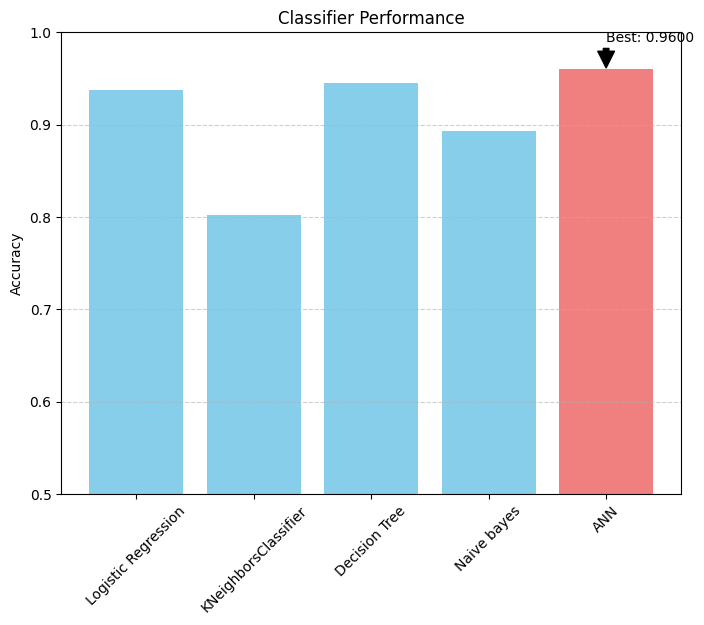

In [30]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = ["Logistic Regression","KNeighborsClassifier", "Decision Tree", "Naive bayes","ANN"]
accuracies = [0.937, 0.8019,0.945,0.8929,0.96]
# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['skyblue'] * len(classifiers)
colors[best_index] = 'lightcoral'

# Create a vertical bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

# Annotate the best classifier with an arrow
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.5, 1)  # Adjusted limits to better fit the accuracy range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()